<a id=start></a>
# № 3 Учебный Проект → «Стримчик» 🎮

ревьювер → **Олег Мазуренко**

В этом учебном проекте постараемся выявить закономерности определяющие успешность игр для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Исследование позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными.

Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkGreen'>👌 Было бы не плохо добавить план исследования в описание проекта.</font>

похоже, найден оригинал данных…

[video game sales on kaggle.com](https://www.kaggle.com/datasets/gregorut/videogamesales) 🤫

<div class="alert alert-info" role="alert">
    <p class="mb-0">В коде использую <code>display()</code>, потомучто это однозначно даёт понять что планируется вывод / печать результатов. То есть использую <code>display()</code> намеренно, хотя понимаю что можно и без него выводить данные. 👌</p>
</div>

<hr>

## Шаг 0

In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_formats = ['svg']

In [159]:
# seaborn style via MATPLOTLIBRC
custom_params = {'figure.figsize': (10, 6),
                'figure.facecolor': '#232425',
                'figure.dpi': 240,

                'legend.frameon': False,
                'legend.borderpad': 1.4,
                'legend.labelspacing': 0.7,
                'legend.handlelength': 0.7,
                'legend.handleheight': 0.7,

                'axes.facecolor': '#232425',
                'axes.labelcolor': '#EEEEEE',
                'axes.labelpad': 17,
                'axes.spines.left': False,
                'axes.spines.bottom': False,
                'axes.spines.right': False,
                'axes.spines.top': False,
                'axes.grid': False,

                'contour.linewidth': 0.0,

                'xtick.color': '#AAAAAA',
                'ytick.color': '#AAAAAA',
                'xtick.bottom': True,
                'xtick.top': False,
                'ytick.left': True,
                'ytick.right': False,

                'text.color': '#EEEEEE',
                # 'font.family': 'sans-serif',
                # 'font.sans-serif': [
                #     'Helvetica',
                #     'Verdana',
                #     'sans-serif'
                #     ]
                }
sns.set_theme(style='darkgrid', rc=custom_params)
sns.set_context("notebook", font_scale=1.37)

<hr>

## Шаг 1. Откроем файл с данными и изучим общую информацию

Загружаем данные тестового задания.

In [4]:
try:
    games_df = pd.read_csv('./datasets/games.csv')
except FileNotFoundError:
    games_df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
    print('games_df loaded by url')

Заменим названия столбцов (приведем к нижнему регистру);

In [5]:
games_df.columns = games_df.columns.str.lower()

Посмотрим есть ли явные дубликаты в наборе данных.

In [6]:
len(games_df.loc[games_df.duplicated()])

0

In [7]:
display(
    games_df.sample(7)
)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
961,Namco Museum,PS2,2001.0,Misc,1.73,0.07,0.00,0.02,72.0,6,E
9752,Ferrari Challenge Trofeo Pirelli,PS2,2008.0,Racing,0.06,0.05,0.00,0.02,NaN,7,E
16204,Marginal #4: Idol of Supernova,PSV,2014.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
13143,Steins;Gate 0,PS4,2015.0,Adventure,0.00,0.00,0.05,0.00,81.0,8.3,M
1741,Midnight Club 3: DUB Edition Remix,PS2,2006.0,Racing,0.97,0.04,0.00,0.16,85.0,8.9,E10+
4194,Inazuma Eleven Go 2: Chrono Stone,3DS,2012.0,Role-Playing,0.00,0.01,0.46,0.00,NaN,NaN,NaN
4445,Robert Ludlum's The Bourne Conspiracy,X360,NaN,Action,0.26,0.13,0.00,0.04,71.0,7.2,T


In [8]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Колонки с пропусками:

In [9]:
display(
    games_df.columns[games_df.isna().any()].tolist(),
)

['name', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']

⭕️ 'name' `NaN`  
⭕️ 'year_of_release' `NaN`  
⭕️ 'genre' `NaN`  
⭕️ 'critic_score' `NaN`  
⭕️ 'user_score' `NaN`  
⭕️ 'rating' `NaN`  

#### `name` — название игры

In [10]:
display(
    games_df.loc[games_df['name'].isna()]
)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Всего два пропуска в столбце `name`, поэтому удалим эти строки без зазрения совести…

In [11]:
games_df.dropna(axis=0, subset=['name'], inplace=True)

In [12]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


✅ ‘name’ `NaN`  
⭕️ 'year_of_release' `NaN`  
⭕️ 'genre' `NaN`  
⭕️ 'critic_score' `NaN`  
⭕️ 'user_score' `NaN`  
⭕️ 'rating' `NaN`  

In [13]:
display(
    games_df.loc[games_df['name'] == 'Madden NFL 13']
)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [14]:
display(
    len(games_df['name'].unique())
)

11559

#### `year_of_release` — год выпуска

In [15]:
display(
    games_df.groupby(
        by='year_of_release'
    )['name'].nunique()
)

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      40
1992.0      41
1993.0      59
1994.0     117
1995.0     215
1996.0     258
1997.0     282
1998.0     364
1999.0     326
2000.0     325
2001.0     428
2002.0     631
2003.0     546
2004.0     550
2005.0     657
2006.0     773
2007.0     884
2008.0    1039
2009.0    1001
2010.0     900
2011.0     779
2012.0     446
2013.0     335
2014.0     319
2015.0     362
2016.0     297
Name: name, dtype: int64

Заменим `NaN` на `1970`, в расчётах не будем учитывать)

In [16]:
games_df[
        'year_of_release'
    ].fillna(
        value=1970,
        inplace=True
    )

✅ ‘name’ `NaN`  
✅ 'year_of_release' `NaN`  
⭕️ 'genre' `NaN`  
⭕️ 'critic_score' `NaN`  
⭕️ 'user_score' `NaN`  
⭕️ 'rating' `NaN`

#### `genre` — жанр игры

Посмотрим уникальные жанры

In [17]:
display(
    list(games_df['genre'].unique())
)

['Sports',
 'Platform',
 'Racing',
 'Role-Playing',
 'Puzzle',
 'Misc',
 'Shooter',
 'Simulation',
 'Action',
 'Fighting',
 'Adventure',
 'Strategy']

`NaN` для `genre` удалили вместе с `NaN` для столбца `name`

In [18]:
print(
    'пропусков в genre: ',
    len(games_df.loc[games_df['genre'].isna()].index)
)

пропусков в genre:  0


#### `critic_score` — оценка критиков (максимум 100)

In [19]:
display(
    games_df['critic_score'].describe()
)

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [20]:
print(
    'Количество продаж игр, у которых пропущена оценка критиков',
)
display(
    games_df.loc[
        games_df['critic_score'].isna()
        , ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
    ].describe()
)

print(
    'Количество продаж игр, у которых известна оценка критиков'
)
display(
    games_df.loc[
        games_df['critic_score'].notna()
        , ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
    ].describe()
)

Количество продаж игр, у которых пропущена оценка критиков


,na_sales,eu_sales,jp_sales,other_sales
count,8576.000000,8576.000000,8576.000000,8576.000000
mean,0.178215,0.085017,0.099065,0.023535
std,0.715940,0.321036,0.343974,0.088748
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.020000,0.000000,0.000000,0.000000
75%,0.140000,0.050000,0.060000,0.020000
max,29.080000,10.950000,10.220000,2.740000


Количество продаж игр, у которых известна оценка критиков


,na_sales,eu_sales,jp_sales,other_sales
count,8137.000000,8137.000000,8137.000000,8137.000000
mean,0.352980,0.208311,0.055028,0.072435
std,0.896476,0.635622,0.265075,0.249204
min,0.000000,0.000000,0.000000,0.000000
25%,0.050000,0.010000,0.000000,0.010000
50%,0.130000,0.050000,0.000000,0.020000
75%,0.340000,0.180000,0.010000,0.060000
max,41.360000,28.960000,6.500000,10.570000


Заменим `NaN` на `-1`, то есть значение пропущенно.

In [21]:
games_df[
        'critic_score'
    ].fillna(
    value=-1,
    inplace=True
)

✅ ‘name’ `NaN`  
✅ 'year_of_release' `NaN`  
✅ 'genre' `NaN`  
✅ 'critic_score' `NaN`  
⭕️ 'user_score' `NaN`  
⭕️ 'rating' `NaN`

#### `user_score` — оценка пользователей (максимум 10)

In [22]:
display(
    games_df['user_score'].describe()
)

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

**tbd — To Be Determined.**
В интернетах пишут, что `'tbd'` обозначают оценки у которых недостаточно проголосовавших. То есть например игру оценили менее 4 игроков.

Заменим `'tbd'` на `13`, потомучто оценка не можеть быть больше **10**.

In [23]:
games_df['user_score'].replace(
    to_replace='tbd',
    value=13,
    inplace=True
)

Заменим `NaN` на `-1`, то есть значение пропущенно.

In [24]:
games_df['user_score'].fillna(
    value=-1,
    inplace=True
)

In [25]:
display(
    games_df.loc[
        (games_df['user_score'] != -1)
        & (games_df['user_score'] != 13),
        'user_score'
    ].describe()
)

count     7590
unique      95
top        7.8
freq       324
Name: user_score, dtype: object

In [26]:
display(
    len(games_df.loc[
        (games_df['user_score'] == -1)
        & (games_df['user_score'] == 13)
    ].index)
)

0

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Теперь у нас две заглушки в одной колонке и код для ее фильтрации при анализе будет в два раза длиннее.</font>

<div class="alert alert-info" role="alert">
    <p class="mb-0">Согласен, не очень кайфово.</p>
</div>

✅ ‘name’ `NaN`  
✅ 'year_of_release' `NaN`  
✅ 'genre' `NaN`  
✅ 'critic_score' `NaN`  
✅ 'user_score' `NaN`  
⭕️ 'rating' `NaN`

#### `rating` — рейтинг от организации ESRB

(англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [27]:
display(
    games_df.loc[
        games_df['rating'].isna(),
        'name'
    ].count()
)

6764

In [28]:
display(
    games_df.loc[
        games_df['rating'].notna(),
            'rating'
    ].unique()
)

array(['E', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

- ` E ` — Everyone → 1994–1998 (as K-A), 1998–present (as E)
- ` M ` — Mature 17+ → 1994–present
- ` T ` — Teen → 1994–present
- ` E10+ ` — Everyone 10+ → 2005–present
- ` K-A ` — Everyone → 1994–1998
- ` A-0 ` — Adults Only 18+ → 1994–present
- ` EC ` — Early Childhood → 1994–2018
- ` RP ` — Rating Pending → 1994–present
- ` no_ESRB ` — without ESRB

In [29]:
games_df['rating'].fillna(
    value='no_ESRB',
    inplace=True
)

In [30]:
display(
    games_df.loc[
        (games_df['rating'] == 'no_ESRB')
        & (games_df['na_sales'] > 0)
        & (games_df['year_of_release'] > 1994),
        ['name', 'platform', 'na_sales', 'user_score', 'critic_score']
    ]
)

,name,platform,na_sales,user_score,critic_score
4,Pokemon Red/Pokemon Blue,GB,11.27,-1,-1.0
10,Nintendogs,DS,9.05,-1,-1.0
12,Pokemon Gold/Pokemon Silver,GB,9.00,-1,-1.0
20,Pokemon Diamond/Pokemon Pearl,DS,6.38,-1,-1.0
25,Pokemon Ruby/Pokemon Sapphire,GBA,6.06,-1,-1.0
...,...,...,...,...,...
16675,Original Frisbee Disc Sports: Ultimate & Golf,DS,0.01,-1,-1.0
16693,PGA European Tour,N64,0.01,-1,-1.0
16694,Carmageddon 64,N64,0.01,-1,-1.0
16708,Woody Woodpecker in Crazy Castle 5,GBA,0.01,-1,-1.0


In [31]:
display(
    games_df.loc[
        (games_df['rating'] == 'no_ESRB')
        & (games_df['na_sales'] > 0)
        & (games_df['year_of_release'] > 1994)
        & (games_df['user_score'] == games_df['critic_score']),
        'user_score'
    ].count()
)

2653

In [32]:
display(
    games_df.loc[
        (games_df['rating'] == 'no_ESRB')
        & (games_df['na_sales'] > 0)
        & (games_df['year_of_release'] > 1994)
        & (games_df['user_score'] == games_df['critic_score']),
        ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
    ].describe()
)

,na_sales,eu_sales,jp_sales,other_sales
count,2653.000000,2653.000000,2653.000000,2653.000000
mean,0.327037,0.183777,0.080795,0.045062
std,0.682279,0.500065,0.424728,0.132794
min,0.010000,0.000000,0.000000,0.000000
25%,0.050000,0.010000,0.000000,0.000000
50%,0.130000,0.050000,0.000000,0.010000
75%,0.310000,0.160000,0.000000,0.040000
max,11.270000,10.950000,10.220000,2.740000


> пропуск не савязан с ошибкой заполнения данных

> не только для Северной Америки выпускаются игры

In [33]:
display(
    games_df.loc[
        games_df['rating'].isna()
        , 'name'
    ].count()
)

0

✅️ ‘name’ `NaN`  
✅️ 'year_of_release' `NaN`  
✅️ 'genre' `NaN`  
✅️ 'critic_score' `NaN`  
✅️ 'user_score' `NaN`  
✅️ 'rating' `NaN`

### Посмотрим на остальные колонки:

#### `platform` — платформа

In [34]:
display(
    sorted(games_df['platform'].unique()),
    len(games_df['platform'].unique()),
)

['2600',
 '3DO',
 '3DS',
 'DC',
 'DS',
 'GB',
 'GBA',
 'GC',
 'GEN',
 'GG',
 'N64',
 'NES',
 'NG',
 'PC',
 'PCFX',
 'PS',
 'PS2',
 'PS3',
 'PS4',
 'PSP',
 'PSV',
 'SAT',
 'SCD',
 'SNES',
 'TG16',
 'WS',
 'Wii',
 'WiiU',
 'X360',
 'XB',
 'XOne']

31

#### `na_sales` — продажи в Северной Америке (миллионы проданных копий)

In [35]:
display(
    games_df['na_sales'].describe(),
    games_df.loc[games_df['na_sales'] > 4]
)

count    16713.000000
mean         0.263302
std          0.813565
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1,no_ESRB
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,no_ESRB
...,...,...,...,...,...,...,...,...,...,...,...
145,Sonic the Hedgehog 2,GEN,1992.0,Platform,4.47,1.20,0.16,0.19,-1.0,-1,no_ESRB
183,Madden NFL 2004,PS2,1970.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
238,Madden NFL 2005,PS2,2004.0,Sports,4.18,0.26,0.01,0.08,91.0,7.9,E
240,Pitfall!,2600,1981.0,Platform,4.21,0.24,0.00,0.05,-1.0,-1,no_ESRB


#### `eu_sales` — продажи в Европе (миллионы проданных копий)

In [36]:
display(
    games_df['eu_sales'].describe()
)

count    16713.000000
mean         0.145045
std          0.503359
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

#### `jp_sales` — продажи в Японии (миллионы проданных копий)

In [37]:
display(
    games_df['jp_sales'].describe()
)

count    16713.000000
mean         0.077625
std          0.308871
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

#### `other_sales` — продажи в других странах (миллионы проданных копий)

In [38]:
display(
    games_df['other_sales'].describe()
)

count    16713.000000
mean         0.047343
std          0.186742
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

После заполнения пропусков `NaN` проверим на дубликаты..

In [153]:
display(
    len(games_df.loc[
        games_df.duplicated()
    ].index)
)

0

🪄

<hr>

## Шаг 2. Подготовьте данные

### Преобразуем данные в подходящие и достаточные типы данных.

Уменьшим количество памяти, которое занимает DataFrame.

In [154]:
games_df = games_df.astype(
    {
        'platform': 'category',
        'year_of_release': 'uint16',
        'genre': 'category',
        'na_sales': 'float16',
        'eu_sales': 'float16',
        'jp_sales': 'float16',
        'other_sales': 'float16',
        'critic_score': 'int8',
        'user_score': 'float16',
        'rating': 'category',
    }
)

In [155]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16713 non-null  category
 2   year_of_release  16713 non-null  uint16  
 3   genre            16713 non-null  category
 4   na_sales         16713 non-null  float16 
 5   eu_sales         16713 non-null  float16 
 6   jp_sales         16713 non-null  float16 
 7   other_sales      16713 non-null  float16 
 8   critic_score     16713 non-null  int8    
 9   user_score       16713 non-null  float16 
 10  rating           16713 non-null  category
 11  sum_sales        16713 non-null  float16 
dtypes: category(3), float16(6), int8(1), object(1), uint16(1)
memory usage: 557.0+ KB


Присвоили надлежащие типы данных и теперь DataFrame использует в памяти 0.5 Mb вместо 1.4 Mb.

<hr>

Посчитаем суммарное количество продаж во всех регионах и запишем их в отдельный столбец.

In [42]:
games_df['sum_sales'] = games_df.loc[
    : ,
    ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
].sum(axis=1)

In [156]:
display(
    games_df.sample(3)
)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
6790,Guitar Freaks,PS,1999,Simulation,0.00000,0.000000,0.229980,0.020004,-1,-1.000000,no_ESRB,0.250000
2458,NBA 2K10,PS3,2009,Sports,0.75000,0.010002,0.010002,0.070007,83,7.800781,E,0.839355
5909,Wacky Races: Crash & Dash,Wii,2008,Racing,0.27002,0.000000,0.000000,0.020004,-1,-1.000000,no_ESRB,0.290039


<hr>

## Шаг 3. Исследуем данные

In [45]:
with_years = games_df['year_of_release'] != 1970

In [46]:
with_users_score = games_df['user_score'] != -1

In [47]:
with_users_score_value = (
    (games_df['user_score'] != -1)
    & (games_df['user_score'] != 13)
)

In [48]:
with_critics_score = games_df['critic_score'] != -1

In [49]:
with_rating = games_df['rating'] != 'no_ESRB'

In [50]:
start_year = 1990

In [51]:
analytic_start_year = 2012

In [52]:
years_analytics = (
    with_years
    & (games_df['year_of_release'] >= analytic_start_year)
)

### Сколько игр выпускалось в разные годы.

In [62]:
games_by_years = games_df.loc[
    with_years,
    ['year_of_release',
     'name',
     'platform']
]

In [63]:
display(
    games_by_years.sample(5)
)

,year_of_release,name,platform
4506,2015,WWE 2K16,X360
2476,2008,Madden NFL 09 All-Play,Wii
11255,2016,SD Gundam G Generation Genesis,PSV
1569,2013,Final Fantasy X / X-2 HD Remaster,PS3
8766,2000,NCAA GameBreaker 2001,PS2


[Text(0.5, 1.0, 'количество выпущенных игр'),
 Text(0.5, 0, 'год'),
 Text(0, 0.5, 'количество')]

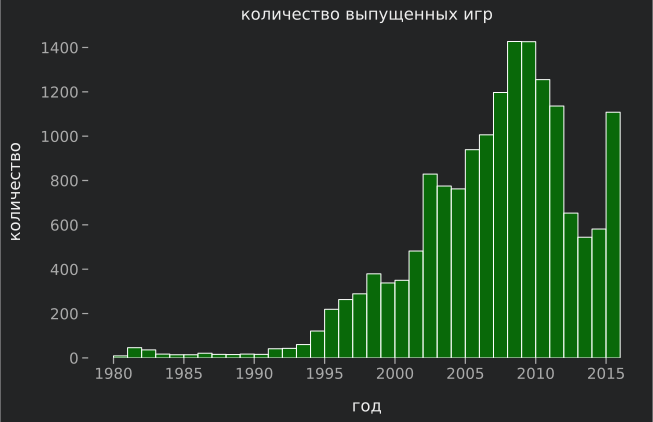

In [165]:
sns.histplot(
    data=games_by_years,
    x='year_of_release',
    binwidth=1,
    color='green'
).set(
    title='количество выпущенных игр',
    xlabel='год',
    ylabel='количество'
)

In [166]:
platforms_by_years = games_df.loc[
    years_analytics,
    ['year_of_release',
     'platform']
]

platforms_by_years = platforms_by_years.groupby(
        by='year_of_release'
    )['platform'].nunique()

platforms_by_years = platforms_by_years.reset_index()

[Text(0.5, 1.0, 'количество платформ'),
 Text(0.5, 0, 'год'),
 Text(0, 0.5, 'количество')]

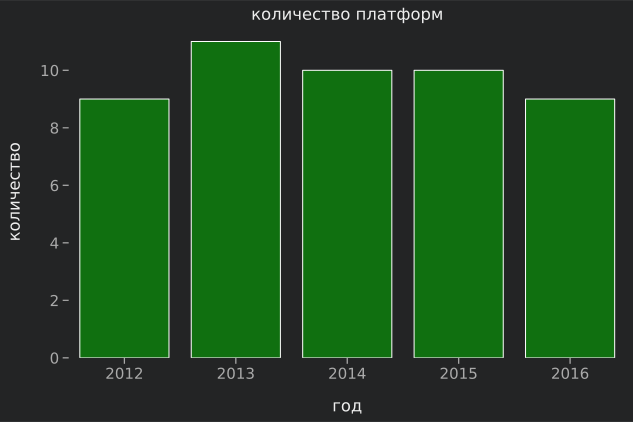

In [167]:
sns.barplot(
    data=platforms_by_years,
    x='year_of_release',
    y='platform',
    hue=None,
    color='green',
    # binwidth=1,
).set(
    title='количество платформ',
    xlabel='год',
    ylabel='количество',
)

# .set_xticklabels(labels=[1990, 1995, 2000, 2005, 2010, 2015], rotation=30)

 Важны ли данные за все периоды?

In [67]:
def count_platform(year):
    platform_list = list(
        games_df.loc[
            games_df['year_of_release'] >= year,
            'platform'
        ].unique()
    )

    return platform_list

Платформы начиная с 1990

In [68]:
year_90 = 1990
print(f'Количество платформ начиная с {year_90} г = {len(count_platform(year_90))}')

Количество платформ начиная с 1990 г = 30


Платформы начиная с 1995

In [69]:
year_95 = 1995
print(f'Количество платформ начиная с {year_95} г =  {len(count_platform(year_95))}')

Количество платформ начиная с 1995 г =  26


Платформы начиная с 2000

In [70]:
year_00 = 2000
print(f'Количество платформ начиная с {year_00} г = {len(count_platform(year_00))}')

Количество платформ начиная с 2000 г = 20


Платформы начиная с 2005

In [71]:
year_05 = 2005
print(f'Количество платформ начиная с {year_05} г = {len(count_platform(year_05))}')

Количество платформ начиная с 2005 г = 16


Платформы начиная с 2010

In [72]:
year_10 = 2010
print(f'Количество платформ начиная с {year_10} г = {len(count_platform(year_10))}')

Количество платформ начиная с 2010 г = 12


Платформы начиная с 2015

In [73]:
year_15 = 2015
print(f'Количество платформ начиная с {year_15} г = {len(count_platform(year_15))}')

Количество платформ начиная с 2015 г = 10


In [74]:
platform_90 = list(games_by_years['platform'].unique())


In [75]:
display(
    sorted(games_df.loc[
        games_df['year_of_release'] < start_year,
        'platform'
    ].unique())
)

['2600',
 '3DS',
 'DS',
 'GB',
 'GBA',
 'GC',
 'N64',
 'NES',
 'PC',
 'PS',
 'PS2',
 'PS3',
 'PSP',
 'PSV',
 'Wii',
 'X360',
 'XB']

### Актуальный период

Актуальный период возьмём с 2012.  
Потомучто время жизни платформы 7~10 лет. То есть пик популярности примерно в середине этого периода. Значит имеет смысл смотреть данные за последние 4 года, чтобы понять на какую платформу и жанры делать ставку…

### Как менялись продажи по платформам.

Выбирем латформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [76]:
platforms_releases = games_df.loc[
        years_analytics,
        ['year_of_release', 'platform', 'name']
    ]

In [77]:
games_to_heatmap = platforms_releases.groupby(
    by=['platform', 'year_of_release']
)[['name']].count()

games_to_heatmap = games_to_heatmap.reset_index()
games_to_heatmap = games_to_heatmap.pivot(
    index='platform',
    columns='year_of_release',
    values='name'
)

[Text(0.5, 1.0, 'количество игр для платформ'),
 Text(0.5, 22.06666666666664, 'год'),
 Text(163.66666666666666, 0.5, 'платформы')]

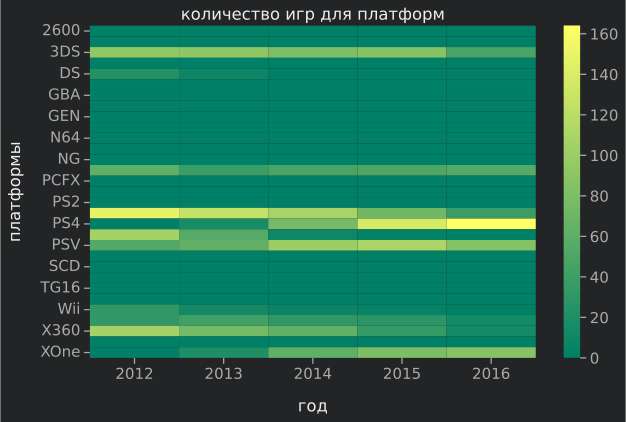

In [162]:
sns.heatmap(
    data=games_to_heatmap,
    cmap='summer',
).set(
    title='количество игр для платформ',
    xlabel='год',
    ylabel='платформы',
)

На графике видно что платформы популярны среди GameDev компаний от 7-10 лет. Очень похоже что это цыкл жизни платформы. С 1990 до 2000 всплесков по платформам 4-6. С 1995 платформа PS и N64 были популярны. А вот с 2000 количество игр для разных платформ увеличилось значительно. Можно заметить что PC не самая популярная, но «долгоиграющая» платформа.
Таким обазом потенциальные платформы для разработки лучше выбирать из тех что популярны и прибыльны с 2012 по 2016, так в 2017 платформа будет на пике популярности.

### Какие платформы лидируют по продажам, растут или падают?

In [79]:
platforms_sales = games_df.loc[
    with_years
    & (games_df['year_of_release'] >= analytic_start_year),
    ['year_of_release', 'platform', 'sum_sales']
]

In [80]:
sales_to_heatmap = platforms_sales.groupby(
    by=['platform', 'year_of_release']
)[['sum_sales']].sum()

In [81]:
sales_to_heatmap = sales_to_heatmap.reset_index()
sales_to_heatmap = sales_to_heatmap.pivot(
    index='platform',
    columns='year_of_release',
    values='sum_sales'
)

<a id="omg"></a>

[Text(0.5, 1.0, 'сумма продаж игр для платформ'),
 Text(0.5, 22.06666666666664, 'год'),
 Text(163.66666666666666, 0.5, 'платформы')]

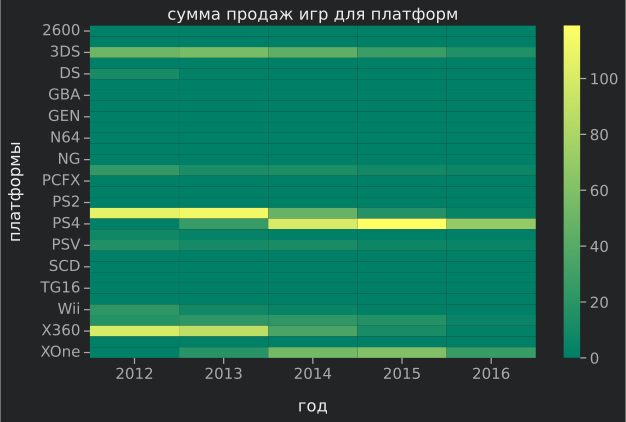

In [161]:
sns.heatmap(
    data=sales_to_heatmap,
    cmap='summer',
).set(
    title='сумма продаж игр для платформ',
    xlabel='год',
    ylabel='платформы',
)

 Выбераем несколько потенциально прибыльных платформ.

Для каких платформ сделаи большенство игр с 2012 по 2016:
- XOne
- X360
- WiiU
- PSP
- PS4
- PS3
- PS
- 3DS

Для каких платформ продали больше копий с 2012 по 2016:
- XOne
- X360
- WiiU
- PSV
- PS4
- PS3
- PS
- 3DS

В итоге можно сделать ставку на:
- XOne
- PS4
- PC
- 3DS

<hr>

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.


[Text(0.5, 1.0, 'сумма продаж игр для платформ c 2012 г'),
 Text(0.5, 0, 'млн копий'),
 Text(0, 0.5, 'платформы'),
 None]

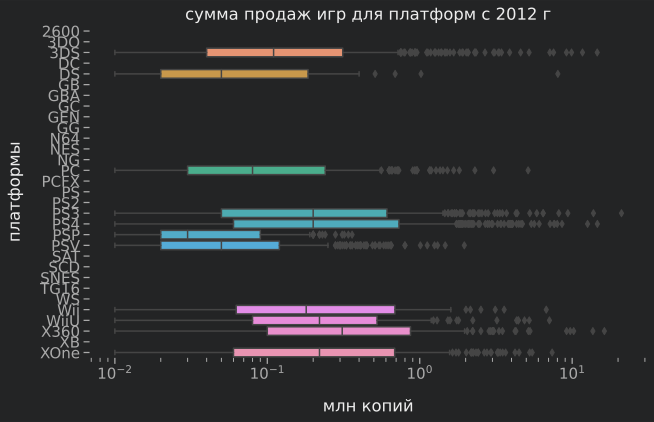

In [160]:
list_of_sales = games_df.loc[
        (games_df['year_of_release'] >= analytic_start_year),
        ['sum_sales', 'platform']
]

sns.boxplot(
    data=list_of_sales,
    x='sum_sales',
    y='platform',
).set(
    title=f'сумма продаж игр для платформ c {analytic_start_year} г',
    xlabel='млн копий',
    ylabel='платформы',
    xscale='log',
)

Через функцию строит только крайнее значение. 🤷‍♂️

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Что у нас написано в задании: <br><b>Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.</b> <br>Нам необходимо построить диаграммы размаха по продажам за весь актуальный период, разбивка по годам не требуется. И необходимо описать результат этого анализа.</font>

<div class="alert alert-info" role="alert">
    <p class="mb-0">Выбросы оставил, удалял их для масштаба. Done.</p>

</div>

[Вот здесь](#omg) за актуальный период график с тем же смыслом, только более информативный. Поэтому boxplot делал с разбивкой по годам чтобы динамику было видно.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 С помощью боксплотов показывать динамику достаточно сложно, их смысл не много в другом, см рисунок. Для динамики имело смысл показывать изменение медиан продаж платформ по годам релиза.</font>
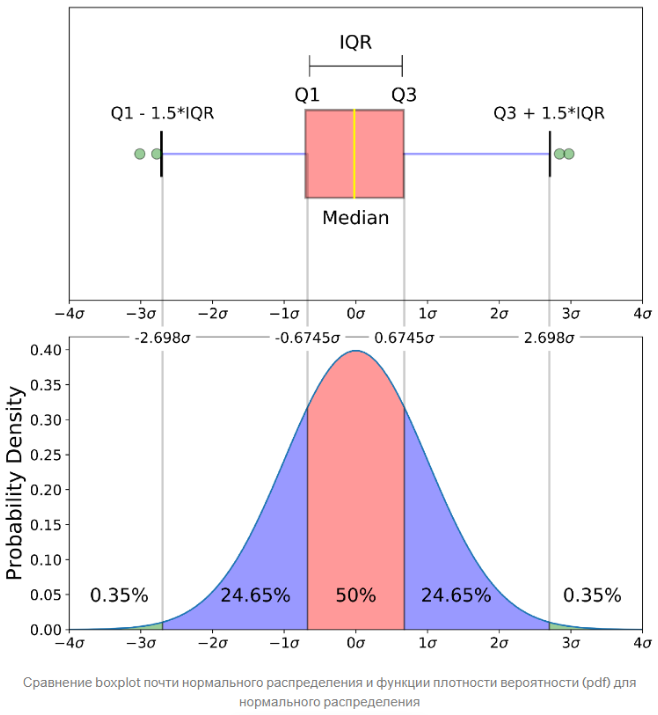

<hr>

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.


In [84]:
ps4_review_sales = games_df.loc[
    (games_df['year_of_release'] >= analytic_start_year)
    & (games_df['user_score'] != -1)
    & (games_df['user_score'] != 13)
    & (games_df['critic_score'] != -1)
    & (games_df['platform'] == 'PS4'),
    ['sum_sales', 'user_score', 'critic_score']
]

In [85]:
ps4_review_sales_users = games_df.loc[
    (games_df['year_of_release'] >= analytic_start_year)
    & (games_df['user_score'] != -1)
    & (games_df['user_score'] != 13)
    & (games_df['platform'] == 'PS4'),
    ['sum_sales', 'user_score']
]

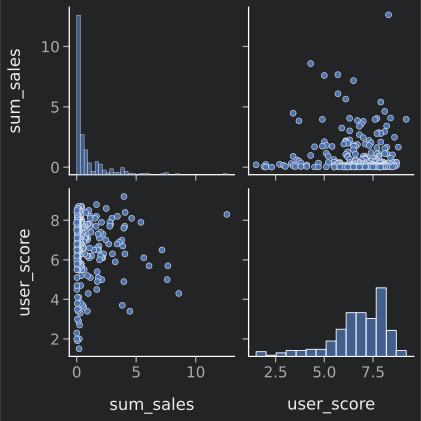

In [168]:
scatter =sns.pairplot(data=ps4_review_sales_users,
             height=3,
             aspect=1,
             )

In [87]:
display(
    ps4_review_sales_users.corr()
)

,sum_sales,user_score
sum_sales,1.000000,-0.032015
user_score,-0.032015,1.000000


In [88]:
ps4_review_sales_critics = games_df.loc[
    (games_df['year_of_release'] >= analytic_start_year)
    & (games_df['critic_score'] != -1)
    & (games_df['platform'] == 'PS4'),
    ['sum_sales', 'critic_score']
]

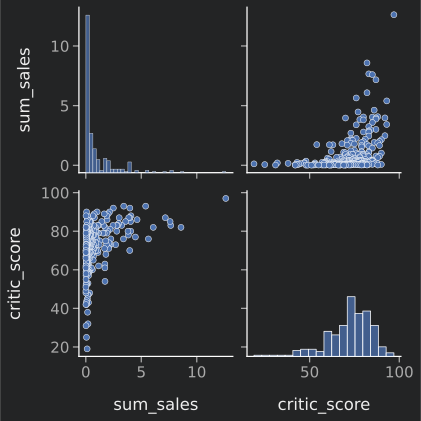

In [169]:
scatter =sns.pairplot(data=ps4_review_sales_critics,
             height=3,
             aspect=1,
             )

In [90]:
display(
    ps4_review_sales_critics.corr()
)

,sum_sales,critic_score
sum_sales,1.00000,0.40658
critic_score,0.40658,1.00000


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Как-то мы оптом отфильтровываем заглушки. Если мы анализируем отзывы пользователей, то фильтруем заглушки по ним. Если анализируем отзывы критиков, то фильтруем эти заглушки. А вот удаление одновременно и тех и других ведет к необоснованному удалению данных и искажению расчета корреляции. См.код ниже.</font>

In [91]:
# Комментарий ревьюера
print(len(games_df.query("platform == 'PS4' & year_of_release >= 2012 & critic_score != -1 &\
                         user_score != -1 & user_score != 13")))
print(len(games_df.query("platform == 'PS4' & year_of_release >= 2012 & critic_score != -1")))
print(len(games_df.query("platform == 'PS4' & year_of_release >= 2012 & user_score != -1 & user_score != 13")))

249
252
257


<div class="alert alert-info" role="alert">
    <p class="mb-0">Резонно, но в задании "отзывы пользователей <strong>и</strong> критиков", поэтому и смотрел вместе эти колонки.</p>

</div>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Правильно "отзывы пользователей и критиков" и их влияние на продажи. А вот если бы строили диаграмму рассеяния отзывов пользователей и отзывов критиков, то да, надо было фильтровать одновременно.</font>

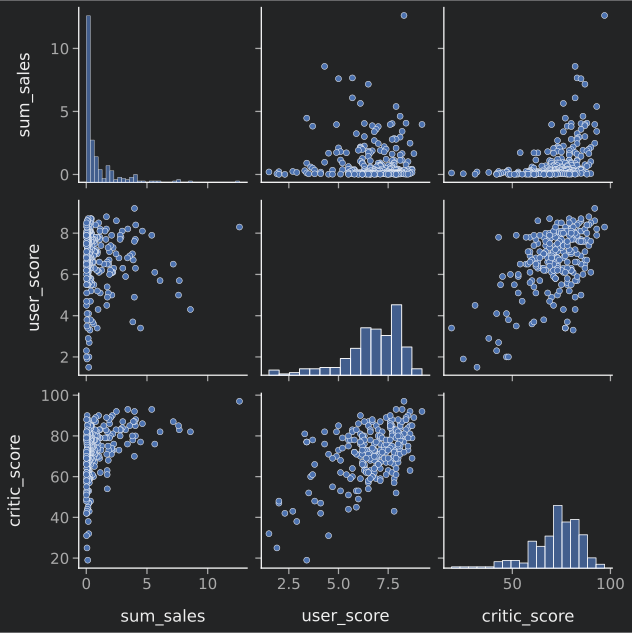

In [170]:
scatter =sns.pairplot(data=ps4_review_sales,
             height=3,
             aspect=1,
             )

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Визуализация должна помогать сделать анализ данных, но для этого график должен быть виден полностью, без необходимости использования полос прокрутки.</font>

<div class="alert alert-info" role="alert">
    <p class="mb-0">DataSpell масштабирует графики по ширине экрана. Уменьшил ширину.</p>

</div>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Еще раз хочу обратить внимание, что в реальном проекте у заказчика может не быть внешних примочек, а только элементарный JupyterNotebook или ГуглКолаб. Ну не разработчик он, он заказчик, который платит деньги за проект.</font>

 Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [93]:
display(
    ps4_review_sales.corr()
)

,sum_sales,user_score,critic_score
sum_sales,1.000000,-0.033673,0.405907
user_score,-0.033673,1.000000,0.557659
critic_score,0.405907,0.557659,1.000000


Присутствует положительная слабая корреляция 0.41 оценки критиков и суммы продаж.
Практически отсутствует корреляция между суммой продаж и отзывами пользователей. Что интересно, знак «–».
Умеренная корреляция 0.56 между оценками критиков и пользователей, то есть можно предположить что в целом и общем критики и пользователи сходятся во мнении)

А как с продажами игр на других платформах?


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 В задании написано: <b>Соотнесите выводы с продажами игр на других платформах.</b> А мы сравнили только одну и остальное суммарно только расчитали корреляцию. Выводы, сделанные на основе диаграмм рассеяния и расчетов по нескольким платформам выглядят "весомей" и убедительней. Все платформы не надо, но хотя бы штук пять. Построение диаграмм рассеяния и расчет корреляции можно сделать циклом.</font>

<div class="alert alert-info" role="alert">
    <p class="mb-0">"Соотнесите выводы с продажами игр на других платформах" != "Все платформы не надо, но хотя бы штук пять"</p>

</div>

In [94]:
def shtuk_pyat_user(platforma):
    print(platforma)
    other_review_sales_user = games_df.loc[
        (games_df['year_of_release'] >= analytic_start_year)
        & (games_df['user_score'] != -1)
        & (games_df['user_score'] != 13)
        & (games_df['platform'] == platforma),
        ['sum_sales', 'user_score']
    ]
    display(
        other_review_sales_user.corr()
    )
    return other_review_sales_user

In [95]:
def shtuk_pyat_critic(platforma):
    print(platforma)
    
    other_review_sales_user = games_df.loc[
        (games_df['year_of_release'] >= analytic_start_year)
        & (games_df['critic_score'] != -1)
        & (games_df['platform'] == platforma),
        ['sum_sales', 'critic_score']
    ]
    
    display(
        other_review_sales_user.corr()
    )
    return other_review_sales_user

In [96]:
platform_2_compare = pd.Series(data=('XOne', 'X360', 'WiiU', 'PSV', 'PS3'))
print('Пользователи\n')
user_score_sum_sales = platform_2_compare.apply(shtuk_pyat_user)

print('Критики\n')
critic_score_sum_sales = platform_2_compare.apply(shtuk_pyat_critic)


Пользователи

XOne


,sum_sales,user_score
sum_sales,1.000000,-0.069075
user_score,-0.069075,1.000000


X360


,sum_sales,user_score
sum_sales,1.000000,0.006246
user_score,0.006246,1.000000


WiiU


,sum_sales,user_score
sum_sales,1.000000,0.400276
user_score,0.400276,1.000000


PSV


,sum_sales,user_score
sum_sales,1.000000,-0.004216
user_score,-0.004216,1.000000


PS3


,sum_sales,user_score
sum_sales,1.000000,-0.005066
user_score,-0.005066,1.000000


Критики

XOne


,sum_sales,critic_score
sum_sales,1.000000,0.416974
critic_score,0.416974,1.000000


X360


,sum_sales,critic_score
sum_sales,1.000000,0.360632
critic_score,0.360632,1.000000


WiiU


,sum_sales,critic_score
sum_sales,1.00000,0.34833
critic_score,0.34833,1.00000


PSV


,sum_sales,critic_score
sum_sales,1.000000,0.094513
critic_score,0.094513,1.000000


PS3


,sum_sales,critic_score
sum_sales,1.000000,0.331435
critic_score,0.331435,1.000000


In [97]:
display(
    user_score_sum_sales[0]
)

,sum_sales,user_score
165,5.468750,7.898438
179,5.261719,5.398438
242,4.488281,6.398438
270,4.218750,6.199219
373,3.500000,4.101562
...,...,...
16544,0.010002,6.800781
16597,0.010002,6.000000
16630,0.010002,8.203125
16643,0.010002,6.601562


Интересно, что у платформы WiiU есть положительная корреляция 0.4 отзывов и количества продаж.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families wer

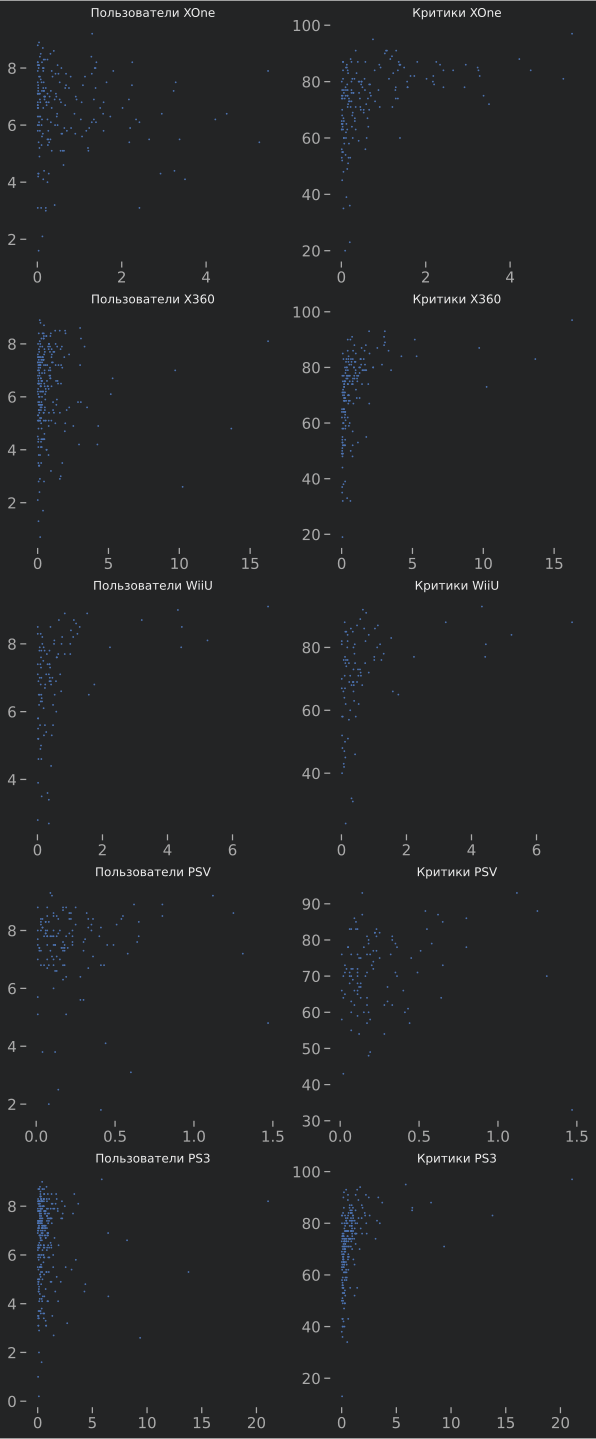

In [98]:
size_of_marker = 0.7

fig, axes = plt.subplots(nrows=5, ncols= 2,figsize=(10,25), dpi=216,)

for k in range(len(platform_2_compare)):
    axes[k, 0].scatter(
        x=user_score_sum_sales[k]['sum_sales'],
        y=user_score_sum_sales[k]['user_score'],
        s=size_of_marker,
    )
    axes[k, 0].set_title(
        str(f'Пользователи {platform_2_compare[k]}'),
        fontsize = 12,
    )
    
for c in range(len(platform_2_compare)):
    axes[c, 1].scatter(
        x=critic_score_sum_sales[c]['sum_sales'],
        y=critic_score_sum_sales[c]['critic_score'],
        s=size_of_marker,
    )
    axes[c, 1].set_title(
        str(f'Критики {platform_2_compare[c]}'),
        fontsize = 12,
    )

In [99]:
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠  А где диаграммы рассеяния?</font>
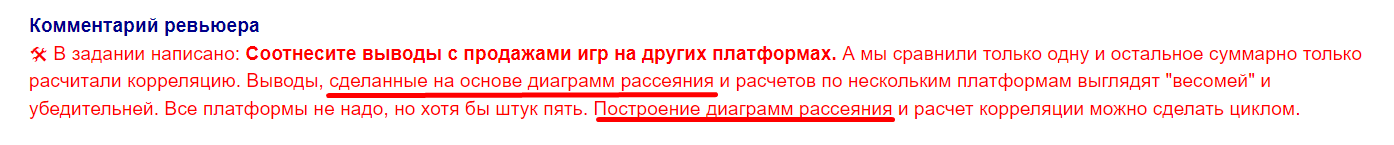

<div class="alert alert-info" role="alert">
    <p class="mb-0">Диаграммы рассеяния</p>

</div>

> Посмотрите, как влияют на продажи **внутри одной популярной платформы отзывы пользователей и критиков**. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

<div class="alert alert-info" role="alert">
    <p class="mb-0">"одной популярной платфоры"</p>

</div>

Ккоэффициент кореляции количества продаж с оценкой критиков подозрительно низкий для PSV, может потомучто эта платформа популярна только в Японии (10% продаж). На остальных платформах **слабая** корреляция есть 0.33 ~ 0.41.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Для оценки корреляции лучше пользоваться вот этой шкалой:</font>
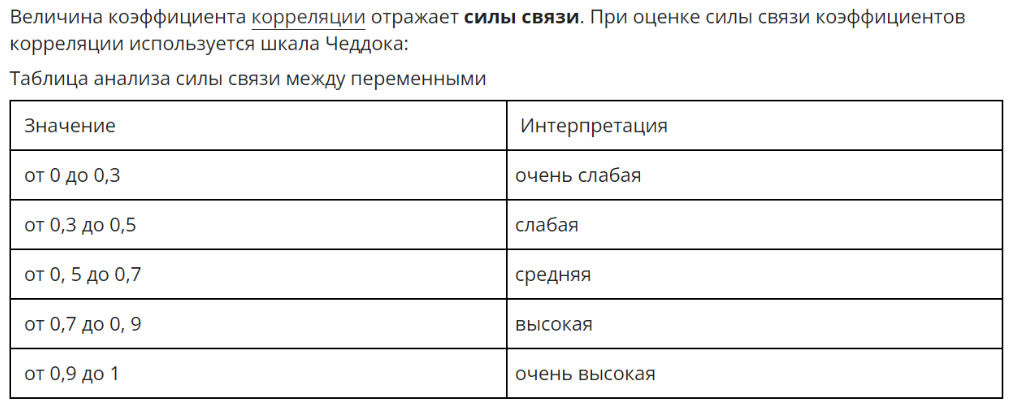

### Общее распределение игр по жанрам.

In [100]:
games_genre = games_df.loc[
    with_years
    & (games_df['year_of_release'] >= analytic_start_year),
    ['sum_sales', 'genre']
]

In [101]:
games_genre = games_genre.groupby(by='genre').mean()
games_genre.reset_index(inplace=True)
games_genre.sort_values(by='sum_sales', ascending=False, inplace=True)

In [102]:
display(
    games_genre
)

,genre,sum_sales
8,Shooter,1.296678
4,Platform,0.717753
10,Sports,0.675574
7,Role-Playing,0.521069
6,Racing,0.465267
3,Misc,0.442974
9,Simulation,0.439019
0,Action,0.427873
2,Fighting,0.408164
11,Strategy,0.187892


[Text(0.5, 1.0, 'медиана проданных копий игр с 2012 г'),
 Text(0.5, 0, 'жанры'),
 Text(0, 0.5, 'млн копий')]

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families wer

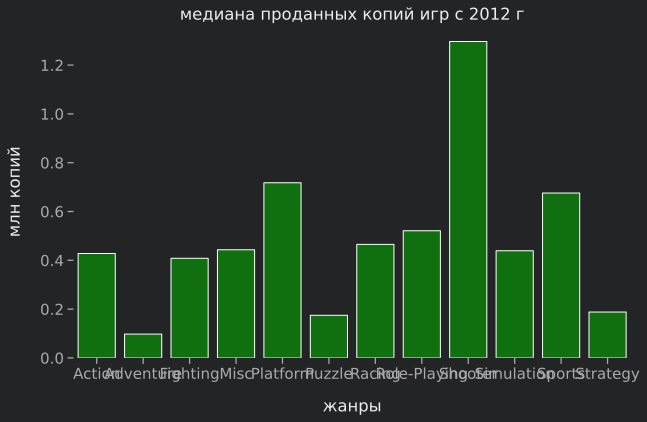

In [103]:
sns.barplot(data=games_genre,
            x='genre',
            y='sum_sales',
            color='green'
            ).set(
    title=f'медиана проданных копий игр с {analytic_start_year} г',
    xlabel='жанры',
    ylabel='млн копий',
)

 Что можно сказать о самых прибыльных жанрах?

- Shooter
- Platform
- Sports

Самые продаваемые с 2012 года. «Движ» — продаётся хорошо…

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что мы не попали в ловушку, что максимальные продажи являются самыми прибыльными. В данных продажи по жанру для разных платформ и если одна платформа со своей одной игрой в данном жанре выстрелила, а остальные провалились, то мы все равно будем видеть максимум общих продаж, даже если остальные платформы по этому жанру были не удачны. Но для прибыльности нам нужны стабильные жанры, который приносит доход не зависимо от платформы, значит на этот жанр есть устойчивый спрос.  Было бы не плохо сравнение продаж проиллюстрировать диаграммой размаха. Сделаем? </font>

Выделяются ли жанры с высокими и низкими продажами?

А вот у
- Puzzle
- Strategy
- Adventure

Дела не так хорошо, самые низкие медианы продаж…

<hr>

## Шаг 4. Составьте портрет пользователя каждого региона

Посмотрим по регионам где какие жанры продаются лучше.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Мы пропустили следующее задание: <b>Самые популярные платформы (топ-5). Опишите различия в долях продаж.</b></font>

<div class="alert alert-info" role="alert">
    <p class="mb-0">Добавил.</p>

</div>

### Самые популярные платформы в Северной Америке (топ-5).

In [104]:
games_platforms_na = games_df.loc[
    with_years
    & (games_df['year_of_release'] >= analytic_start_year),
    ['platform', 'na_sales']
]

In [105]:
all_na_sales = round(
    games_platforms_na['na_sales'].sum()
)

In [106]:
games_platforms_na = games_platforms_na.groupby(by='platform').sum()
games_platforms_na.reset_index(inplace=True)
games_platforms_na.sort_values(by='na_sales', ascending=False, inplace=True)

games_platforms_na.drop(
    games_platforms_na.iloc[5: ].index
    , inplace=True
)

games_platforms_na['na_percentage'] = (
        (games_platforms_na['na_sales']
         / all_na_sales) * 100
)

games_platforms_na['na_percentage'] = games_platforms_na['na_percentage'].round(decimals=2)
games_platforms_na['na_sales'] = round(games_platforms_na['na_sales'] * 1_000_000)
games_platforms_na['na_sales'] = games_platforms_na['na_sales'].astype('uint32')

In [107]:
games_platforms_na.reset_index(drop=True, inplace=True)

other_sales_na = (
    (all_na_sales * 1_000_000)
    - games_platforms_na['na_sales'].sum()
)

other_perc_na = (
    other_sales_na
    / (all_na_sales * 10_000)
)

games_platforms_na.loc[
    len(games_platforms_na.index)
] = ['Other', other_sales_na, other_perc_na]

In [108]:
display(games_platforms_na)

,platform,na_sales,na_percentage
0,X360,140041595,23.700001
1,PS4,108743294,18.400000
2,PS3,103379135,17.490000
3,XOne,93119469,15.760000
4,3DS,55314072,9.360000
5,Other,90402435,15.296520


### Самые популярные платформы в Европе (топ-5).

In [109]:
games_platforms_eu = games_df.loc[
    with_years
    & (games_df['year_of_release'] >= analytic_start_year),
    ['platform', 'eu_sales']
]

In [110]:
all_eu_sales = int(
    games_platforms_eu['eu_sales'].sum()
)

In [111]:
games_platforms_eu = games_platforms_eu.groupby(by='platform').sum()
games_platforms_eu.reset_index(inplace=True)
games_platforms_eu.sort_values(by='eu_sales', ascending=False, inplace=True)

games_platforms_eu.drop(
    games_platforms_eu.iloc[5: ].index
    , inplace=True
)

games_platforms_eu['eu_percentage'] = (
        (games_platforms_eu['eu_sales']
         / all_eu_sales) * 100
)

games_platforms_eu['eu_percentage'] = games_platforms_eu['eu_percentage'].round(decimals=2)
games_platforms_eu['eu_sales'] = round(games_platforms_eu['eu_sales'] * 1_000_000)
games_platforms_eu['eu_sales'] = games_platforms_eu['eu_sales'].astype('uint32')

In [112]:
games_platforms_eu.reset_index(drop=True, inplace=True)

other_sales_eu = (
    (all_eu_sales * 1_000_000)
    - games_platforms_eu['eu_sales'].sum()
)

other_perc_eu = (
    other_sales_eu
    / (all_eu_sales * 10_000)
)

games_platforms_eu.loc[
    len(games_platforms_eu.index)
] = ['Other', other_sales_eu, other_perc_eu]

In [113]:
display(games_platforms_eu)

,platform,eu_sales,eu_percentage
0,PS4,141088257,27.879999
1,PS3,106862701,21.120001
2,X360,74522346,14.730000
3,XOne,51589081,10.200000
4,3DS,42641350,8.430000
5,Other,89296265,17.647483


### Самые популярные платформы в Японии (топ-5).

In [114]:
games_platforms_jp = games_df.loc[
    with_years
    & (games_df['year_of_release'] >= analytic_start_year),
    ['platform', 'jp_sales']
]

In [115]:
all_jp_sales = int(
    games_platforms_jp['jp_sales'].sum()
)

In [116]:
games_platforms_jp = games_platforms_jp.groupby(by='platform').sum()
games_platforms_jp.reset_index(inplace=True)
games_platforms_jp.sort_values(by='jp_sales', ascending=False, inplace=True)

games_platforms_jp.drop(
    games_platforms_jp.iloc[5: ].index
    , inplace=True
)

games_platforms_jp['jp_percentage'] = (
        (games_platforms_jp['jp_sales']
         / all_jp_sales) * 100
    )

games_platforms_jp['jp_percentage'] = np.around(
    a=games_platforms_jp['jp_percentage'],
    decimals=2
)
games_platforms_jp['jp_sales'] = round(games_platforms_jp['jp_sales'] * 1_000_000)
games_platforms_jp['jp_sales'] = games_platforms_jp['jp_sales'].astype('uint32')

In [117]:
games_platforms_jp.reset_index(drop=True, inplace=True)

other_sales_jp = (
    (all_jp_sales * 1_000_000)
    - games_platforms_jp['jp_sales'].sum()
)

other_perc_jp = (
    other_sales_jp
    / (all_jp_sales * 10_000)
)

games_platforms_jp.loc[len(games_platforms_jp.index)] = ['Other', other_sales_jp, other_perc_jp]

In [118]:
display(games_platforms_jp)

,platform,jp_sales,jp_percentage
0,3DS,87789742,45.720001
1,PS3,35289169,18.379999
2,PSV,21040649,10.960000
3,PS4,15960663,8.310000
4,WiiU,13009621,6.780000
5,Other,18910156,9.849040


Опишите различия в долях продаж.

#### Доли Продаж Игр По Платформам

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families wer

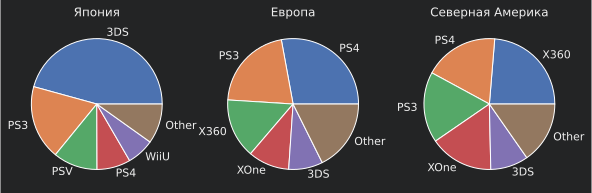

In [119]:
fig, axes = plt.subplots(1, 3)

axes[0].pie(games_platforms_jp['jp_sales'],
            labels=games_platforms_jp['platform'],
            textprops={'size': 11},
)
axes[0].set_title('Япония', fontsize = 12)

axes[1].pie(games_platforms_eu['eu_sales'],
            labels=games_platforms_eu['platform'],
            textprops={'size': 11},
)
axes[1].set_title('Европа', fontsize = 12)

axes[2].pie(games_platforms_na['na_sales'],
            labels=games_platforms_na['platform'],
            textprops={'size': 11},
)
axes[2].set_title('Северная Америка', fontsize = 12)

plt.show()

В Европе с 2012 года больше всего копий игр продано для PS4 24.9% и PS3 18.1%, X360 12.6% и XOne 8.7%, DS3 7.2% замыкает. Похоже что в Европе PS пользуется популярностью.

В северной Америке с 2012 года больше всего копий игр продано для X360 23.7%, PS4 опережает PS3 всего на ~ 1%, похоже что это этап перехода от одной версии PS к другой.

В Японии 45.7% 3DS, платформа которая в Северной Амереке и Европе замыкает топ-5, странно что PS4 еще не так популярен в Японии всего 8.3%.

<hr>

### Продажи в Северной Америке `na_sales`

In [120]:
games_genre_na = games_df.loc[
    with_years
    & (games_df['year_of_release'] >= analytic_start_year),
    ['na_sales', 'genre']
]

In [121]:
games_genre_na = games_genre_na.groupby(by='genre').sum()
games_genre_na.reset_index(inplace=True)
games_genre_na.sort_values(by='na_sales', ascending=False, inplace=True)

all_na_sales = games_genre_na['na_sales'].sum()
games_genre_na['na_percentage'] = (
        (games_genre_na['na_sales'] / all_na_sales) * 100
    )
games_genre_na['na_percentage'] = games_genre_na['na_percentage'].round(decimals=2)
games_genre_na['na_sales'] = round(games_genre_na['na_sales'] * 1_000_000)
games_genre_na['na_sales'] = games_genre_na['na_sales'].astype('uint32')

In [122]:
display(
    games_genre_na.loc[: , ][0: 5]
)

,genre,na_sales,na_percentage
0,Action,177842239,30.09
8,Shooter,144765717,24.50
10,Sports,81528511,13.80
7,Role-Playing,64001068,10.83
3,Misc,38189590,6.46


- Shooter
- Sports
- Platform
- Misc
- Fighting


Самые продаваемые жанры в Северной Америке с 2012 года. По медиане количества продаж копий игр.

### Продажи в Европе `eu_sales`

In [123]:
games_genre_eu = games_df.loc[
    with_years
    & (games_df['year_of_release'] >= analytic_start_year),
    ['eu_sales', 'genre']
]

In [124]:
games_genre_eu = games_genre_eu.groupby(by='genre').sum()
games_genre_eu.reset_index(inplace=True)
games_genre_eu.sort_values(by='eu_sales', ascending=False, inplace=True)

all_eu_sales = games_genre_eu['eu_sales'].sum()
games_genre_eu['eu_percentage'] = (
        (games_genre_eu['eu_sales'] / all_na_sales) * 100
)

games_genre_eu['eu_percentage'] = games_genre_eu['eu_percentage'].round(decimals=2)
games_genre_eu['eu_sales'] = round(games_genre_eu['eu_sales'] * 1_000_000)
games_genre_eu['eu_sales'] = games_genre_eu['eu_sales'].astype('uint32')

In [125]:
display(
    games_genre_eu.loc[: , ][0: 5]
)

,genre,eu_sales,eu_percentage
0,Action,159345367,26.959999
8,Shooter,113469337,19.200001
10,Sports,69088005,11.690000
7,Role-Playing,48532280,8.210000
6,Racing,27290527,4.620000


- Action
- Shooter
- Sports
- Role-Playing
- Racing


Самые продаваемые жанры в Европе с 2012 года. По медиане количества продаж копий игр.

### Продажи в Японии `jp_sales`

In [126]:
games_genre_jp = games_df.loc[
    with_years
    & (games_df['year_of_release'] >= analytic_start_year),
    ['jp_sales', 'genre']
]

In [127]:
games_genre_jp = games_genre_jp.groupby(by='genre').sum()
games_genre_jp.reset_index(inplace=True)
games_genre_jp.sort_values(by='jp_sales', ascending=False, inplace=True)

all_jp_sales = games_genre_jp['jp_sales'].sum()
games_genre_jp['jp_percentage'] = (
        (games_genre_jp['jp_sales'] / all_na_sales) * 100
)

games_genre_jp['jp_percentage'] = games_genre_jp['jp_percentage'].round(decimals=2)
games_genre_jp['jp_sales'] = round(games_genre_jp['jp_sales'] * 1_000_000)
games_genre_jp['jp_sales'] = games_genre_jp['jp_sales'].astype('uint32')

In [128]:
display(
    games_genre_jp.loc[: , ][0: 5]
)

,genre,jp_sales,jp_percentage
7,Role-Playing,65439827,11.07
0,Action,52799255,8.93
3,Misc,12859833,2.18
9,Simulation,10411087,1.76
2,Fighting,9440041,1.60


- Role-Playing
- Action
- Misc
- Simulation
- Platform
- Fighting


Самые продаваемые жанры в Японии с 2012 года. По медиане количества продаж копий игр.

### Продажи в других странах `other_sales`

In [129]:
games_genre_other = games_df.loc[
    with_years
    & (games_df['year_of_release'] >= analytic_start_year),
    ['other_sales', 'genre']
]

In [130]:
games_genre_other = games_genre_other.groupby(by='genre').mean()
games_genre_other.reset_index(inplace=True)
games_genre_other.sort_values(by='other_sales', ascending=False, inplace=True)

games_genre_other['other_sales'] = round(games_genre_other['other_sales'] * 1_000_000)
games_genre_other['other_sales'] = games_genre_other['other_sales'].astype('uint32')

display(
    games_genre_other
)

,genre,other_sales
8,Shooter,158563
10,Sports,83735
4,Platform,65649
6,Racing,56436
0,Action,49604
2,Fighting,41011
7,Role-Playing,40082
3,Misc,39950
9,Simulation,27375
11,Strategy,14931


- Shooter
- Sports
- Platform
- Racing
- Action


Самые продаваемые жанры в других локациях с 2012 года. Кроме Японии, Европы и Северной Америки. По медиане количества продаж копий игр.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Любой анализ данных требует визуализации его результатов. Табличные данные могут только дополнять анализ. У нас этого не сделано. Лучше сделать круговые диаграммы, а данные не вошедшие в ТОП просуммировать и вывести отдельной группой "Другие", и по платформам, и по жанрам. Сделаем? Примерно вот так:</font>
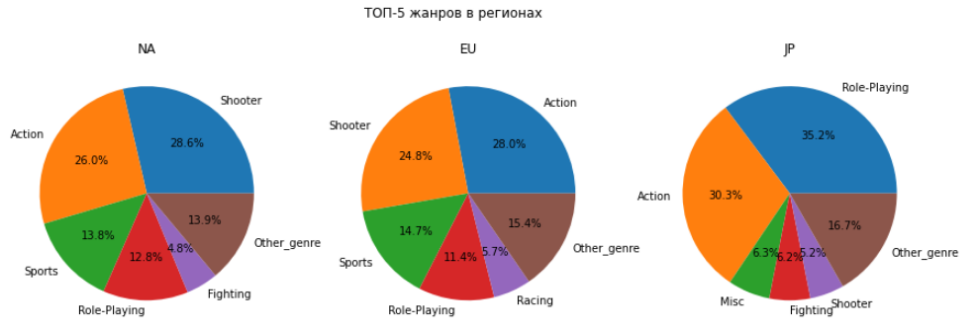

<hr>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Мы пропустили следующее задание: <b>Влияет ли рейтинг ESRB на продажи в отдельном регионе?</b></font>

<div class="alert alert-info" role="alert">
    <p class="mb-0">Добавил. Количество проданных копий игр по регионам и возростному рейтингу.</p>

</div>

In [131]:
rating_sales = (    
    games_df.loc[
        games_df['year_of_release'] >= analytic_start_year,
        ['rating', 'na_sales', 'eu_sales', 'jp_sales']
    ].groupby(by='rating').sum()
)

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Мы при предобработке данных поставили заглушку на пропуски в рейтинге ESRB и это правильно. Но при фильтрации мы их исключили и игры без рейтинга оказываются полностью исключенными из анализа. Но продажи именно этих игр могут указать на ключевое различие в регионах.</font><br>
<font color='DarkMagenta'>👉 А проблема у нас в том, что если посмотреть в инете, что из себя представляет рейтинг ESRB, то окажется, что он предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется. Наша задача смотреть шире на исходный датасет, так как за цифрами находятся реальные бизнес-процессы. И мы должны это учитывать при предобработке данных.</font>

In [132]:
rating_sales.drop(
    labels=rating_sales.loc[
            (rating_sales['na_sales'] == 0)
            & (rating_sales['eu_sales'] == 0)
            & (rating_sales['jp_sales'] == 0)
        ].index,
    inplace=True
)

rating_sales.reset_index(inplace=True)

[Text(0.5, 1.0, 'продано копий игр в Северной Америке'),
 Text(0.5, 0, 'ESRB рейтинг'),
 Text(0, 0.5, 'количество, млн')]

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families wer

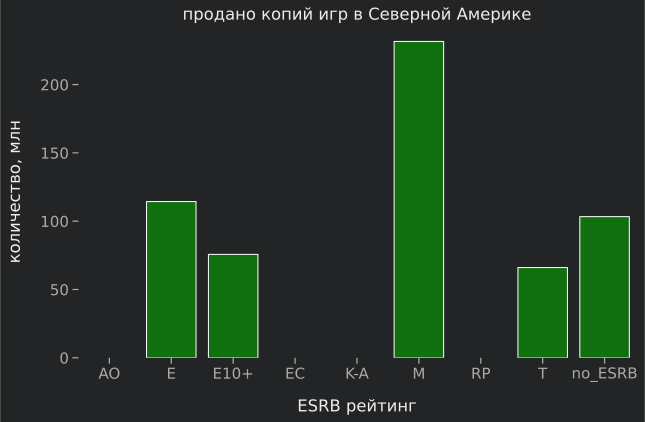

In [133]:
sns.barplot(
    data=rating_sales,
    x='rating',
    y='na_sales',
    color='green'
).set(
    title='продано копий игр в Северной Америке',
    xlabel='ESRB рейтинг',
    ylabel='количество, млн'
)

[Text(0.5, 1.0, 'продано копий игр в Японии'),
 Text(0.5, 0, 'ESRB рейтинг'),
 Text(0, 0.5, 'количество, млн')]

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families wer

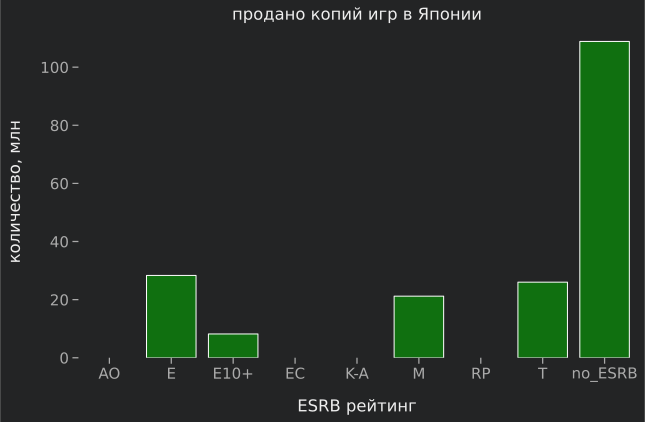

In [134]:
sns.barplot(
    data=rating_sales,
    x='rating',
    y='jp_sales',
    color='green'
).set(
    title='продано копий игр в Японии',
    xlabel='ESRB рейтинг',
    ylabel='количество, млн'
)

[Text(0.5, 1.0, 'продано копий игр в Европе'),
 Text(0.5, 0, 'ESRB рейтинг'),
 Text(0, 0.5, 'количество, млн')]

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Verdana, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families wer

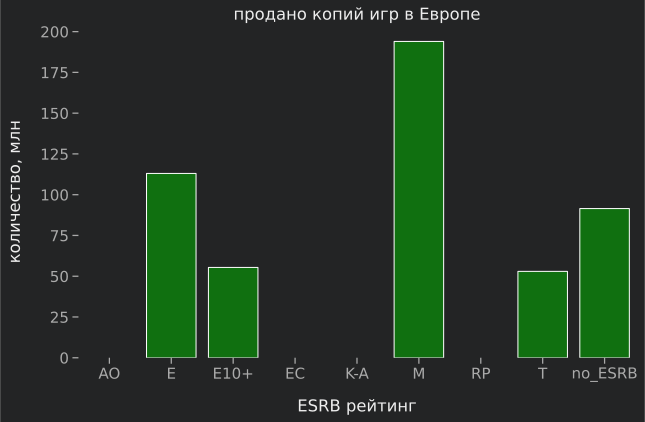

In [135]:
sns.barplot(
    data=rating_sales,
    x='rating',
    y='eu_sales',
    color='green'
).set(
    title='продано копий игр в Европе',
    xlabel='ESRB рейтинг',
    ylabel='количество, млн'
)

In [136]:
display(
    rating_sales
)

,rating,na_sales,eu_sales,jp_sales
0,E,114.366592,113.030197,28.331039
1,E10+,75.701553,55.370743,8.190475
2,M,231.564972,193.963593,21.199867
3,T,66.021141,52.960999,26.019623
4,no_ESRB,103.312660,91.500259,108.840164


- ` E ` — Everyone → 1994–1998 (as K-A), 1998–present (as E)
- ` M ` — Mature 17+ → 1994–present
- ` T ` — Teen → 1994–present
- ` E10+ ` — Everyone 10+ → 2005–present
- ` K-A ` — Everyone → 1994–1998
- ` A-0 ` — Adults Only 18+ → 1994–present
- ` EC ` — Early Childhood → 1994–2018
- ` RP ` — Rating Pending → 1994–present
- ` no_ESRB ` — without ESRB

В Северной Америке и Европе больше всего куплено игр с рейтингом Mature 17+, а в Японии с рейтингом Everyone. В Японии только игры с рейтингом Everyone 10+ менее других покупают. И в Европе соотношение по продажам копий игр похожа на Северную Америку.

### Япония

**Хорошо продаются**  

**Жанры:**  
    Role-Playing 11.1%  
    Action 8.9%

**На платформах:**  
    3DS 45.7%  
    PS3 18.4%  

**С возрастным рейтингом:**  
    E  
    T  

### Северная Америка

**Хорошо продаются**  

**Жанры:**  
    Action 30.1%  
    Shooter 24.5%

**На платформах:**  
    X360 23.7%  
    PS4 18.4%  

**С возрастным рейтингом:**  
    M  
    E  

### Европа

**Хорошо продаются**  

**Жанры:**  
    Action 27%  
    Shooter 19.2%  

**На платформах:**  
    PS4 27.9%
    PS3 21.1%%

**С возрастным рейтингом:**  
    M   
    E  

## Шаг 5. Проверьте гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?

$H_0: \mu_s = \mu_u$ — средние пользовательские рейтинги платформ Xbox One и PC <mark>одинаковая</mark>  
$H_1: \mu_s \neq \mu_u$ — средние пользовательские рейтинги платформ Xbox One и PC <mark>различается</mark>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, правильно сформулированы гипотезы.</font>

In [137]:
xone_score = games_df.loc[
    with_years
    & with_users_score_value
    & (games_df['year_of_release'] >= analytic_start_year)
    & (games_df['platform'] == 'XOne'),
    'user_score'
]

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что отфильтровали заглушки.</font>

In [138]:
xone_score_dispersion = np.var(xone_score, ddof=1)

In [139]:
pc_score = games_df.loc[
    with_years
    & with_users_score_value
    & (games_df['year_of_release'] >= analytic_start_year)
    & (games_df['platform'] == 'PC'),
    'user_score'
]

In [140]:
pc_score_dispersion = np.var(pc_score, ddof=1)

In [141]:
display(
    xone_score.describe(),
    xone_score_dispersion
)

count    182.000000
mean       6.523438
std        1.380859
min        1.599609
25%        5.800781
50%        6.800781
75%        7.500000
max        9.203125
Name: user_score, dtype: float64

1.907

In [142]:
display(
    pc_score.describe(),
    pc_score_dispersion
)

count    206.000000
mean       6.425781
std        1.665039
min        1.400391
25%        5.500000
50%        6.800781
75%        7.699219
max        9.296875
Name: user_score, dtype: float64

2.771

In [143]:
print(
    round(
        pc_score_dispersion / xone_score_dispersion
        , 2)
)

1.45


Дисперсии различаются менее чем в 4 раза $1.45 < 4$, поэтому выбираем `equal_var=True`

$\alpha = 0.01$, критерий значимости
оставим только 1% для ошибки первого рода (отвергнуть нулевую гипотезу, когда она верна)

In [144]:
display(
    st.ttest_ind(
        a=xone_score,
        b=pc_score,
        equal_var = True
    )
)

Ttest_indResult(statistic=0.599126991635923, pvalue=0.5494396655366218)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно, что для тестирования гипотез использован двусторонний t-тест Стьюдента.</font>

Отвергнуть $H_0$ не можем, потомучто $\alpha < pvalue, 0.01 < 0.55$.
То есть вероятность получить такие или ещё более выраженные отличия случайно 54,95%.
Продолжаем считать что в среднем оценки пользователей XOne и PC одинаковые…

### Средние пользовательские рейтинги жанров Action и Sports одинаковые?

$H_0: \mu_s = \mu_u$ — средние пользовательские рейтинги жанров Action и Sports <mark>одинаковая</mark>  
$H_1: \mu_s \neq \mu_u$ — средние пользовательские рейтинги жанров Action и Sports <mark>различается</mark>

$\alpha = 0.01$, критерий значимости
оставим только 1% для ошибки первого рода (отвергнуть нулевую гипотезу, когда она верна)

In [145]:
action_score = games_df.loc[
    with_years
    & with_users_score_value
    & (games_df['year_of_release'] >= analytic_start_year)
    & (games_df['genre'] == 'Action'),
    'user_score'
]

In [146]:
action_score_dispersion = np.var(action_score, ddof=1)

In [147]:
sport_score = games_df.loc[
    with_years
    & with_users_score_value
    & (games_df['year_of_release'] >= analytic_start_year)
    & (games_df['genre'] == 'Sports'),
    'user_score'
]

In [148]:
sport_score_dispersion = np.var(sport_score, ddof=1)

In [149]:
display(
    action_score.describe(),
    action_score_dispersion
)

count    523.000000
mean       6.824219
std        1.374023
min        1.599609
25%        6.250000
50%        7.101562
75%        7.800781
max        9.101562
Name: user_score, dtype: float64

1.889

In [150]:
display(
    sport_score.describe(),
    sport_score_dispersion
)

count    195.000000
mean       5.457031
std        1.739258
min        0.199951
25%        4.300781
50%        5.699219
75%        6.800781
max        8.796875
Name: user_score, dtype: float64

3.023

In [151]:
print(
    round(
        sport_score_dispersion / action_score_dispersion
        , 2)
)

1.6


Дисперсии различаются менее чем в 4 раза $1.6 < 4$, поэтому выбираем `equal_var=True`

In [152]:
display(
    st.ttest_ind(
        a=action_score,
        b=sport_score,
        equal_var = True
    )
)

Ttest_indResult(statistic=10.99406699501953, pvalue=4.3489007599986065e-26)

Можем отвергнуть $H_0$ нулевую гипотезу и принять альтернативную, потомучто $\alpha > pvalue$, $0.01 > 4.3 \times 10^{-26}$.
Считаем что в среднем оценки пользователей для жанров Action и Sport отличаются…

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно, что показаны дополнительно средние пользовательские рейтинги и по платформам, и по жанрам, как иллюстрации не противоречивости наших гипотез.</font>

<hr>

## Шаг 6. Общий вывод

При выборе платформ на 2017 год стоит рассмотреть следующие:

- XOne
- PS4
- PC 
- 3DS

Жанры популярных игр для рынка Японии стоит выбирать отдельно:
Role-Playing 11.1%
Action 8.9%
На платформе:
3DS 45.7%
С возрастным рейтингом:
E и T 

Для Европы и Северной Америки стоит рассмотреть жанры:  
Action  
Shooter  
  
На платформах:  
X360  
PS4  
  
С возрастным рейтингом:  
M  
E  

Разницу в средних оценках пользователей для XOne и PC не удалось выявить.

А вот средние оценки пользователей для жанров Action и Sports, статистически значимо различаются. Похоже, что пользователи более требовательны к спортивному жанру или что спортивные игры хуже проработаны чем экшены…

Интересно что:

В 90-х начинается рост количества выпускаемых игр и к 2008 году пик  1001 игра. А вот дальше количество игр снижается.

Медианная оценка критиков 71, а медианная оценка игроков 7.5, что выше среднего…

Пропуски в `raiting`, отчасти можно объяснить тем, что ESRB начали работу в 1994. То есть до этого играм не присваивали возростного ранга.

Количество платформ с 1990 года снизилось с 30 до 12 платформ в 2016.

В Японии популярны совсем другие жанры, чем в Европе, США или других локациях.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Цель нашего исследования понять, на что потратить рекламный бюджет. В исследовании мы проанализировали игры с разных сторон. Логично, что рекламный отдел от нас ждет на какие платформы (1-2 штуки, на большее у нас не хватит рекламного бюджета), с каким жанром, с каким рейтингом ESRB и в каком регионе рекламировать. Стоит ли обращать внимание на отзывы или нет. <br>У нас вся информация в проекте уже есть, но они же не аналитики, им надо пальцем показать, точнее акцентировать их креативное внимание. Сделаем?</font><br>
<font color='DarkMagenta'>👉 Возможно, придется переделать часть выводов после исправления ошибок. </font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 0</b></font><br>
<font color='DarkGreen'>👌 Алексей!<br></font>
<font color='Red'>🛠 Увы, должен прервать ревью из-за ошибки в коде. Настоятельно рекомендую перед отправкой проекта на ревью проверять в JupyterHub исполнение кода тетрадки.<br>
Жду исправленный проект. Если будут трудности, можно обратиться к куратору. </font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера</b></font><br><br>
<font color='DarkGreen'>👌 Алексей, проект структурирован и проработан.<br>Так держать и дальше! Но мы почему-то пропускаем целые задания из инструкции по проекту.<br></font>
<font color='Red'>🛠 Что нам нужно, что бы сделать проект лучше:</font><br>
<font color='Red'>🛠 Сделать анализ платформ согласно заданию. Диаграммы размаха строить по всем данным без фильтрации и в соответствии с заданием. Раздельно отфильтровать заглушки при анализе отзывов. Анализ влияния отзывов на продажи надо провести по нескольким платформам. Составить портрет пользователя каждого региона в соответствии с заданием.</font><br>
<font color='DarkMagenta'>👉 При исправлении ошибок и недочетов мы приобретем дополнительный опыт и навыки!</font><br>
<font color='DarkGreen'>👌 Жду окончательный вариант! Успехов.</font>

<div class="alert alert-info" role="alert">
    <p class="mb-0">Добавил.</p>

</div>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 2</b></font><br><br>
<font color='DarkGreen'>👌 Алексей, у нас остались еще не доделки. Основные ошибки проекта связаны с тем, что мы не внимательно читаем задание, да и замечания ревьюера то же.</font><br>
<font color='Red'>🛠 Что нам нужно доделать:</font><br>
<font color='Red'>🛠 Анализ влияния отзывов на продажи, включая диаграммы рассеяния, надо провести по нескольким платформам. Переделать анализ влияния рейтинга ESRB на продажи в регионах.</font><br>
<font color='DarkGreen'>👌 Жду окончательный вариант! Успехов.</font>